In [1]:
import os
import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
# Define directories
train_folder = "monkey_species/training/training/"
val_folder = "monkey_species/validation/validation/"
label_file = 'monkey_species/monkey_labels.txt'

In [4]:
# Loading images and labels
def load_images_and_labels(folder_path, label_mapping):
    images = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            label = label_mapping[subfolder]
            for image_file in os.listdir(subfolder_path):
                image_path = os.path.join(subfolder_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

In [6]:
def load_label_mapping(label_file):
    label_mapping = {}
    with open(label_file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            if(len(line) < 2):
                continue
            label_mapping[line[0].strip()] = line[1].strip()
    return label_mapping

In [7]:
label_mapping = load_label_mapping(label_file)
label_mapping

{'Label': 'Latin Name',
 'n0': 'alouatta_palliata',
 'n1': 'erythrocebus_patas',
 'n2': 'cacajao_calvus',
 'n3': 'macaca_fuscata',
 'n4': 'cebuella_pygmea',
 'n5': 'cebus_capucinus',
 'n6': 'mico_argentatus',
 'n7': 'saimiri_sciureus',
 'n8': 'aotus_nigriceps',
 'n9': 'trachypithecus_johnii'}

In [8]:
monkey_labels = pd.read_csv(label_file, header=None)
monkey_labels

,0,1,2,3,4
0,Label,Latin Name,Common Name,Train Images,Validation Images
1,n0,alouatta_palliata\t,mantled_howler,131,26
2,n1,erythrocebus_patas\t,patas_monkey,139,28
3,n2,cacajao_calvus\t,bald_uakari,137,27
4,n3,macaca_fuscata\t,japanese_macaque,152,30
5,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
6,n5,cebus_capucinus\t,white_headed_capuchin,141,28
7,n6,mico_argentatus\t,silvery_marmoset,132,26
8,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
9,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27


In [9]:
train_images, train_labels = load_images_and_labels(train_folder, label_mapping)
val_images, val_labels = load_images_and_labels(val_folder, label_mapping)

/var/folders/h2/zkn_tfl1349fryslq_64798m0000gn/T/ipykernel_15334/922293895.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [10]:
df = pd.DataFrame({'image': train_images, 'label': train_labels})

first_images = df.groupby('label').first()['image']
first_images

label
alouatta_palliata        [[[221, 221, 221], [221, 221, 221], [221, 221,...
aotus_nigriceps          [[[90, 90, 90], [92, 92, 92], [93, 93, 93], [9...
cacajao_calvus           [[[128, 134, 98], [139, 147, 106], [149, 161, ...
cebuella_pygmea          [[[21, 17, 5], [21, 17, 5], [21, 17, 5], [21, ...
cebus_capucinus          [[[83, 95, 11], [85, 97, 13], [83, 95, 11], [7...
erythrocebus_patas       [[[154, 165, 99], [154, 165, 99], [152, 163, 9...
macaca_fuscata           [[[207, 220, 237], [207, 220, 237], [208, 219,...
mico_argentatus          [[[115, 104, 74], [120, 109, 79], [119, 105, 7...
saimiri_sciureus         [[[56, 78, 29], [55, 82, 31], [60, 86, 38], [4...
trachypithecus_johnii    [[[86, 123, 82], [79, 116, 75], [76, 111, 69],...
Name: image, dtype: object

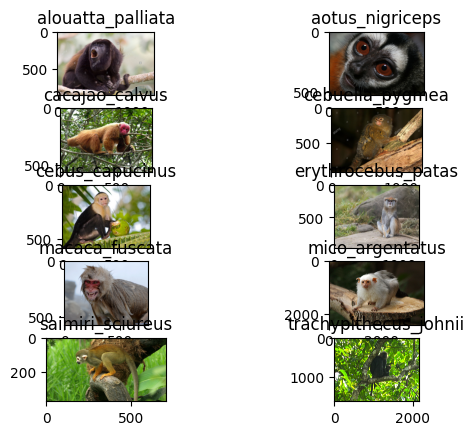

In [11]:
df = pd.DataFrame({'image': train_images, 'label': train_labels})

first_images = df.groupby('label').first()['image']

# Plot the first image in each label
for i, image in enumerate(first_images):
    plt.subplot(5, 2, i+1)
    plt.imshow(image)
    plt.title(first_images.index[i])
plt.show()

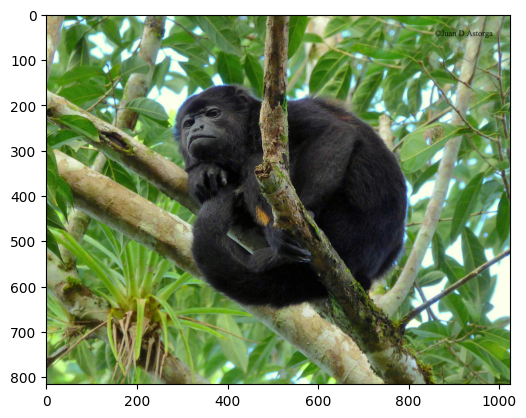

In [12]:
plt.imshow(val_images[0])
plt.show()

### Preprocessing

In [13]:
pd.DataFrame(train_labels)

,0
0,alouatta_palliata
1,alouatta_palliata
2,alouatta_palliata
3,alouatta_palliata
4,alouatta_palliata
...,...
1093,cebus_capucinus
1094,cebus_capucinus
1095,cebus_capucinus
1096,cebus_capucinus


In [14]:
le = LabelEncoder()
le.fit(train_labels)

y_train = le.transform(train_labels)
y_test = le.transform(val_labels)
pd.DataFrame(y_train)[0].unique()


array([0, 8, 9, 1, 7, 5, 3, 6, 2, 4])

Приводим все изображения к одному размеру

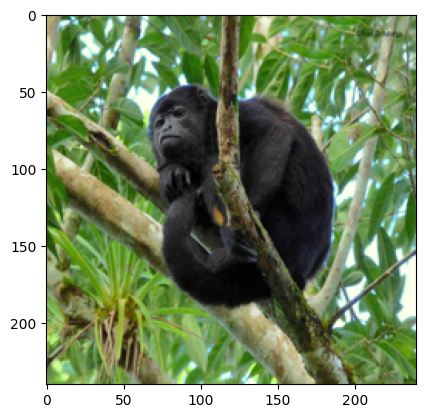

In [15]:
from PIL import Image

size = (240, 240)
train_images_resized = []

for image in train_images:
    pil_image = Image.fromarray(image.astype(np.uint8))
    resized_image = pil_image.resize(size)
    resized_image = np.array(resized_image)
    train_images_resized.append(resized_image)
train_images_resized = np.array(train_images_resized)

test_images_resized = []

for image in val_images:
    pil_image = Image.fromarray(image.astype(np.uint8))
    resized_image = pil_image.resize(size)
    resized_image = np.array(resized_image)
    test_images_resized.append(resized_image)
test_images_resized = np.array(test_images_resized)
plt.imshow(test_images_resized[0])
plt.show()

In [16]:
X_train = train_images_resized / 255.0
X_test = test_images_resized / 255.0

In [17]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Вычисление расстояний между x и всеми обучающими примерами
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Сортировка индексов обучающих примеров по расстоянию
        k_indices = np.argsort(distances)[:self.k]
        # Получение меток k ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Возвращение наиболее часто встречающейся метки
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [19]:
knn = KNN(k=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Точность метода k-ближайших соседей: {accuracy}')


Точность метода k-ближайших соседей: 0.25


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.25

In [50]:
X_test[:,:,:,0].ravel().shape

(15667200,)

In [52]:
X_test.shape

(272, 240, 240, 3)

In [54]:
pd.DataFrame(y_pred)

,0
0,3
1,9
2,6
3,6
4,3
...,...
267,3
268,7
269,5
270,5


In [72]:
X_test.shape

(272, 240, 240, 3)

In [80]:
X = X_test[:,:,:,0] * X_test[:,:,:,1] * X_test[:,:,:,2]
X.shape

(272, 240, 240)

In [ ]:
Xx = X

In [81]:
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.315126,0.281304,0.234468,0.175098,0.244784,0.234583,0.184287,0.156230,0.145915,0.099478,...,0.083993,0.101362,0.135436,0.171336,0.240411,0.330447,0.123984,0.095634,0.186508,0.174255
1,0.288703,0.286297,0.213681,0.197733,0.287962,0.277241,0.168039,0.162589,0.142213,0.079105,...,0.104008,0.122737,0.158101,0.176158,0.199328,0.261869,0.098221,0.092531,0.134160,0.143149
2,0.263946,0.246549,0.223073,0.241476,0.282480,0.236678,0.139830,0.153578,0.150102,0.072341,...,0.124147,0.146511,0.185761,0.193456,0.206558,0.189524,0.069996,0.107871,0.137253,0.118583
3,0.234937,0.227040,0.228261,0.231711,0.247991,0.199083,0.129751,0.150587,0.162236,0.085594,...,0.132833,0.158425,0.190305,0.217098,0.219786,0.148975,0.074258,0.122175,0.100537,0.088646
4,0.279224,0.237843,0.234430,0.204684,0.185923,0.167653,0.163123,0.163797,0.178574,0.231666,...,0.179840,0.192075,0.192505,0.212589,0.236699,0.159694,0.104209,0.101973,0.053735,0.049410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.078884,0.074324,0.069155,0.065781,0.054543,0.066373,0.106463,0.133847,0.150208,0.200770,...,0.110680,0.078062,0.014112,0.095011,0.109135,0.007321,0.012085,0.025176,0.067335,0.072678
236,0.082387,0.079364,0.087296,0.076234,0.055743,0.077078,0.112286,0.142672,0.183013,0.219848,...,0.112200,0.087819,0.005536,0.014974,0.044074,0.008419,0.007760,0.009717,0.036056,0.077424
237,0.081790,0.082615,0.101405,0.094312,0.070168,0.073145,0.094980,0.133813,0.162301,0.171470,...,0.116438,0.082144,0.005907,0.001785,0.001962,0.003688,0.004352,0.006354,0.007991,0.016768
238,0.089084,0.087150,0.106539,0.097917,0.061843,0.062392,0.075306,0.100653,0.114485,0.110245,...,0.126181,0.081724,0.006641,0.008011,0.011561,0.009566,0.014000,0.013808,0.004950,0.006310


In [65]:
X_test[0][:,0,0].shape

(240,)

In [93]:
feature = np.reshape(X_test, (0,1*2*3))
feature.shape

ValueError: cannot reshape array of size 47001600 into shape (0,6)

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(feature)
principalComponents.shape

(57600, 2)

(150, 4)


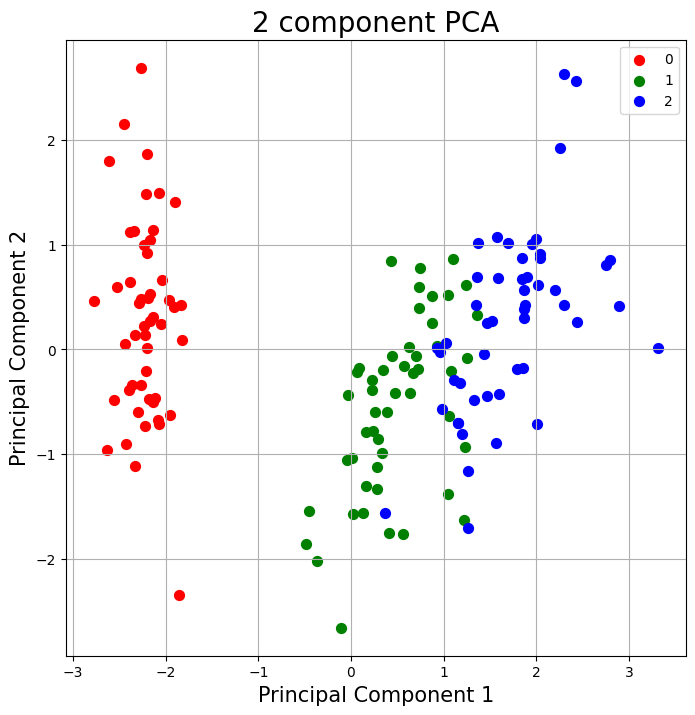

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

sc = StandardScaler()
x = sc.fit_transform(x)
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
sc = StandardScaler()
x = sc.fit_transform(x)
print(x.shape)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()

(2, 3)


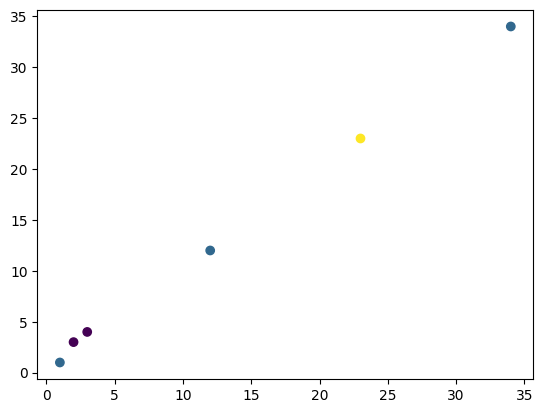

In [71]:
X = [[1,2,3],[23,34,12]]
y = [[1,3,4],[23,34,12]]
print(np.array(X).shape)

c = np.zeros(len(y))

plt.figure()
plt.scatter(X, y, c=[2,1,1,4,2,2])

ValueError: 'c' argument has 272 elements, which is inconsistent with 'x' and 'y' with size 15667200.

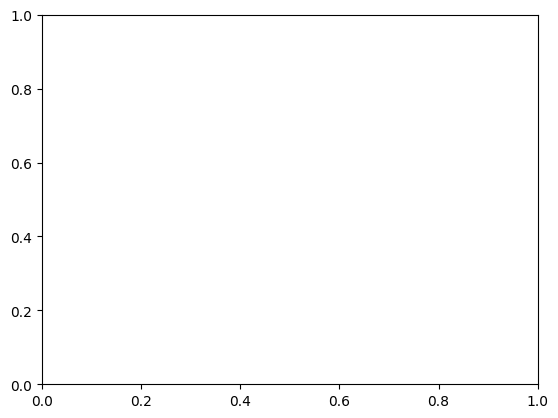

In [49]:
plt.figure()
plt.scatter(X_test[:,0].ravel(), X_test[:,:,:,1].ravel(), c=y_pred)

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

def plot_knn_decision_boundaries(X, y, n_neighbors):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    knn = KNN(k=n_neighbors)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (n_neighbors))

    plt.show()



In [37]:
plot_knn_decision_boundaries(X_train, y_train, 2)

ValueError: operands could not be broadcast together with shapes (2,) (240,240,3) 

## Постройте две модели k-NN с различными наборами признаков:

### Модель 1: Признаки случайно отбираются .

In [ ]:
pd.DataFrame(X_train)